In [1]:
# Reference
# https://yurimkoo.github.io/python/2019/09/14/connect-db-with-python.html

import pandas as pd
import os
from dotenv import load_dotenv
from scipy import stats

# Load api key & RDS info (endpoint="rds 엔드포인트", dbname="db 이름", username="마스터 사용자 이름", password="rds 비밀번호")
load_dotenv()
api_key = os.environ.get("API_KEY")
endpoint = os.environ.get("AWS_endpoint")
dbname = os.environ.get('AWS_dbname')
username = os.environ.get("AWS_username")
password = os.environ.get("AWS_password")

In [2]:
idx = 4
tournament_info = pd.read_csv("./Data/tournament_info.csv")
tournament_info.drop(['Unnamed: 0'], axis = 1, inplace = True)

tournament_name = tournament_info["id"][idx]
tournament_createdAt = tournament_info["createdAt"][idx]

print(tournament_info.loc[idx])

id                        am-pcs6
createdAt    2022-04-15T23:37:54Z
Name: 4, dtype: object


In [3]:
data = pd.read_csv(f"./Data/{tournament_name}_match_info.csv")
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data

,player_id,team_rank,dbnos,assists,boosts,damage_dealt,headshot_kills,heals,kill_streaks,kills,longest_kill,revives,team_kills,time_survived
0,NOOT_seniks,15,0,0,3,24.421543,0,7,0,0,0.00000,0,0,1004
1,NOOT_Lampalot,15,0,0,2,86.176180,0,12,0,0,0.00000,0,0,995
2,NOOT_HalloSenpai,15,0,0,3,0.000000,0,4,0,0,0.00000,0,0,1009
3,NOOT_Lataa,15,0,0,5,0.000000,0,7,0,0,0.00000,0,0,1003
4,YJ_jhownbappe,16,0,0,3,24.600000,0,3,0,0,0.00000,0,0,792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,CREX_lfp1,16,1,0,0,7.740004,0,0,0,0,0.00000,0,0,675
1912,22_v1n1,3,2,2,6,127.198685,0,1,1,1,176.49326,2,0,1634
1913,22_HazeteN,3,1,1,4,203.426600,0,4,1,1,101.40045,0,0,1640
1914,22_Haven,3,3,0,4,582.441160,0,10,1,2,200.74416,0,0,1625


In [4]:
# 결측치 확인
data.isnull().sum()

player_id         0
team_rank         0
dbnos             0
assists           0
boosts            0
damage_dealt      0
headshot_kills    0
heals             0
kill_streaks      0
kills             0
longest_kill      0
revives           0
team_kills        0
time_survived     0
dtype: int64

In [5]:
data = data.groupby('player_id').sum()
data = data.reset_index()
data

,player_id,team_rank,dbnos,assists,boosts,damage_dealt,headshot_kills,heals,kill_streaks,kills,longest_kill,revives,team_kills,time_survived
0,22_Balkkan,196,35,11,113,5717.787026,7,95,23,36,1760.654884,12,2,42706
1,22_Haven,193,36,16,100,8223.608756,7,73,21,29,1313.283853,5,1,39688
2,22_HazeteN,196,33,21,129,8428.786963,3,85,16,25,1431.658003,7,1,40286
3,22_v1n1,196,35,13,109,4926.501037,10,55,23,33,2838.970396,12,0,40504
4,300_Neferhor,273,35,11,70,7017.557722,5,49,18,27,1736.230302,6,0,37296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,YJ_jhownbappe,299,11,6,79,2566.501660,3,129,7,9,421.419888,4,0,30867
60,eU_Fludd,224,38,22,98,8784.088386,7,79,18,23,2725.353719,8,0,40365
61,eU_Kickstart,224,43,17,135,10028.003050,11,85,30,50,1914.323300,7,0,40839
62,eU_Relo,224,38,22,130,8509.391516,12,115,25,40,2558.461059,8,0,40359


In [13]:
data["player_id"].str.find("hwinn") >= 0

0     False
1     False
2     False
3     False
4     False
      ...  
59    False
60    False
61    False
62    False
63    False
Name: player_id, Length: 64, dtype: bool

In [10]:
# Add MVP column
winner_team = "SQ"
data_MVP = 1*(data["player_id"].str.find(f"{winner_team}_") >= 0)
data["win"] = data_MVP
data

,player_id,team_rank,dbnos,assists,boosts,damage_dealt,headshot_kills,heals,kill_streaks,kills,longest_kill,revives,team_kills,time_survived,win
0,22_Balkkan,196,35,11,113,5717.787026,7,95,23,36,1760.654884,12,2,42706,0
1,22_Haven,193,36,16,100,8223.608756,7,73,21,29,1313.283853,5,1,39688,0
2,22_HazeteN,196,33,21,129,8428.786963,3,85,16,25,1431.658003,7,1,40286,0
3,22_v1n1,196,35,13,109,4926.501037,10,55,23,33,2838.970396,12,0,40504,0
4,300_Neferhor,273,35,11,70,7017.557722,5,49,18,27,1736.230302,6,0,37296,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,YJ_jhownbappe,299,11,6,79,2566.501660,3,129,7,9,421.419888,4,0,30867,0
60,eU_Fludd,224,38,22,98,8784.088386,7,79,18,23,2725.353719,8,0,40365,0
61,eU_Kickstart,224,43,17,135,10028.003050,11,85,30,50,1914.323300,7,0,40839,0
62,eU_Relo,224,38,22,130,8509.391516,12,115,25,40,2558.461059,8,0,40359,0


In [14]:
# Z-Score using scipy
z_label = (["team_rank", "dbnos", "assists", "boosts", "damage_dealt", "headshot_kills", "heals", "kill_streaks", "kills", "longest_kill", "revives", "team_kills", "time_survived"])
for i in z_label:
    data[i] = stats.zscore(data[i])

data

,player_id,team_rank,dbnos,assists,boosts,damage_dealt,headshot_kills,heals,kill_streaks,kills,longest_kill,revives,team_kills,time_survived,win
0,22_Balkkan,-1.347514,0.513134,-0.481778,0.386422,-0.266183,0.000000,-0.049233,0.852659,0.784449,0.118280,0.906570,2.819070,1.846352,0
1,22_Haven,-1.416599,0.607233,0.242020,-0.223641,0.933118,0.000000,-0.937953,0.521931,0.178530,-0.526878,-0.965058,1.163836,0.791637,0
2,22_HazeteN,-1.347514,0.324936,0.965819,1.137268,1.031317,-1.048195,-0.453196,-0.304890,-0.167710,-0.356170,-0.430307,1.163836,1.000623,0
3,22_v1n1,-1.347514,0.513134,-0.192259,0.198710,-0.644897,0.786146,-1.665087,0.852659,0.524769,1.673330,0.906570,-0.491398,1.076809,0
4,300_Neferhor,0.425663,0.513134,-0.481778,-1.631478,0.355895,-0.524097,-1.907465,0.025838,0.005410,0.083057,-0.697683,-0.491398,-0.044307,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,YJ_jhownbappe,1.024399,-1.745243,-1.205577,-1.209127,-1.774407,-1.048195,1.324243,-1.793168,-1.552668,-1.813044,-1.232434,-0.491398,-2.291081,0
60,eU_Fludd,-0.702722,0.795431,1.110578,-0.317497,1.201367,0.000000,-0.695575,0.025838,-0.340829,1.509482,-0.162932,-0.491398,1.028232,0
61,eU_Kickstart,-0.702722,1.265926,0.386780,1.418836,1.796711,1.048195,-0.453196,2.010208,1.996287,0.339887,-0.430307,-0.491398,1.193883,0
62,eU_Relo,-0.702722,0.795431,1.110578,1.184196,1.069895,1.310244,0.758694,1.183387,1.130688,1.268804,-0.162932,-0.491398,1.026135,0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

X = data[z_label]
y = data["win"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

print("특성 중요도 : \n{}".format(forest.feature_importances_))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.900
특성 중요도 : 
[0.05775682 0.0728422  0.18116539 0.05089043 0.07800243 0.18904854
 0.04384458 0.0937482  0.11440341 0.04360449 0.00609081 0.00883409
 0.05976861]


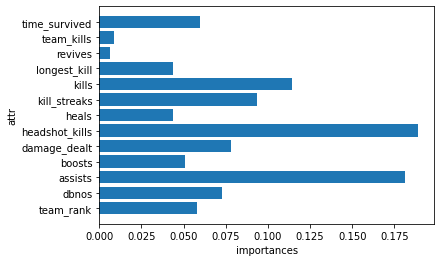

In [16]:
# 특성 중요도 시각화 하기
def plot_feature_importances_cancer(model):
    n_features = len(z_label)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), z_label)
    plt.xlabel("importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
plt.show()

plot_feature_importances_cancer(forest)

In [17]:
mvp_feature = (forest.feature_importances_)*data[z_label]
data["mvp_feature"] = mvp_feature.sum(axis=1)

In [18]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

data.sort_values(["mvp_feature"], ascending=False)

,player_id,team_rank,dbnos,assists,boosts,damage_dealt,headshot_kills,heals,kill_streaks,kills,longest_kill,revives,team_kills,time_survived,win,mvp_feature
42,SQ_TGLTN,-1.416599,3.147907,2.702935,1.278052,3.367809,2.620487,-0.937953,2.175573,2.948445,2.413241,1.441321,1.163836,1.567122,1,2.178395
63,eU_Snakers,-0.702722,0.795431,1.979137,-0.176713,0.798872,2.358438,0.112352,0.191202,0.611329,1.847225,0.906570,4.474304,1.014952,0,1.154132
43,SQ_hwinn,-1.416599,0.419035,2.413416,0.667989,1.299201,1.048195,0.475919,1.018023,0.957568,1.016456,-0.162932,-0.491398,1.575509,1,1.078435
54,YAHO_Shinboi,-1.554769,0.889530,1.255338,1.231124,0.668980,2.096390,0.031560,1.018023,1.390368,0.333801,0.371819,-0.491398,1.539863,0,1.073973
41,SQ_Shrimzy,-1.416599,0.983629,1.544857,0.902629,0.574707,2.096390,-0.655178,1.183387,1.130688,-0.344561,0.639195,1.163836,0.969520,1,1.025455
61,eU_Kickstart,-0.702722,1.265926,0.386780,1.418836,1.796711,1.048195,-0.453196,2.010208,1.996287,0.339887,-0.430307,-0.491398,1.193883,0,1.008390
14,BBB_Sharpshot4K,0.034183,1.830520,0.097260,0.198710,1.400260,1.048195,2.091773,1.844844,2.255966,-0.119430,-0.162932,-0.491398,0.389391,0,1.005916
62,eU_Relo,-0.702722,0.795431,1.110578,1.184196,1.069895,1.310244,0.758694,1.183387,1.130688,1.268804,-0.162932,-0.491398,1.026135,0,0.994853
55,YAHO_sparkingg,-1.554769,1.360025,1.255338,2.498177,1.498964,1.048195,0.597108,0.356567,0.524769,0.664681,0.104444,-0.491398,1.540562,0,0.915907
27,GAS_nicoos,-0.702722,1.265926,1.400098,-0.880631,1.177151,0.786146,0.718298,1.183387,0.957568,1.668775,2.510823,-0.491398,0.854543,0,0.887676
